# Data visualization - Wordcloud

### 1. Extracting data 
**listing 1.1. loading csv file**

In [1]:
import warnings
warnings.filterwarnings('ignore')###There is warnings for new python updates.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# read pizza data
pizza = pd.read_csv("C:/Users/User/OneDrive/Desktop/pizza&GDP.csv", encoding = 'unicode_escape')
pizza.head()

,Unnamed: 0,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,...,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,average_price,GDP
0,0.0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,...,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,19,#ERROR!
1,1.0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,...,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,18.95,#ERROR!
2,2.0,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55,Brentwood,12,278260
3,3.0,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55,Brentwood,13,278260
4,4.0,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55,Brentwood,13,278260


**Listing 1.2. Checking menus_name and average_price for duplicates**

In [2]:
pizza_dict = {'menus_name' : pizza.loc[:, "menus.name"],
              'average_price' : pizza.loc[:, "average_price"],
             'name' : pizza.loc[:, "name"]} ### create target empty sets.
df_pizza = pd.DataFrame(pizza_dict) ### make pizza_dict becomes two dimentional array data.
summary = df_pizza.describe() ### use describe function to find out the duplicates of any menus name and average price.
print(summary) ###print the summary.

          menus_name average_price                name
count           3508          3509                3508
unique          1597           382                 931
top     Cheese Pizza   11.95351764  Sicilia's Pizzeria
freq             136           562                  96


**Listing 1.3. Examining the top-ranked words in the pizza file**

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer ### use TFIDF matrix to rank the frequencies of words.

def rank_words(text_list): ### define the rank euqation.
    vectorizer = TfidfVectorizer(stop_words='english') ### use TFIDF to detect English words.
    tfidf_matrix = vectorizer.fit_transform(text_list.values.astype('U')).toarray() ### vectorize the text list and make it becomes a matrix
    df = pd.DataFrame({'Words': vectorizer.get_feature_names(),
                       'Summed TFIDF': tfidf_matrix.sum(axis=0)}) ### compute TFIDF matrix and sum across the rows of the matrix.
    sorted_df = df.sort_values('Summed TFIDF', ascending=False) ### sort the summed TFIDF in decending way.
    return sorted_df  

### print the top-ranked name in menus
sorted_df_menus = rank_words(df_pizza['menus_name']) ### use the rank function which define previously to rank the menus_name.
print(sorted_df_menus[:5],'\n') ### print out the first five highest frequencies word base on summed TFIDF with the word index.
sorted_df_menus = sorted_df_menus.drop([640]) ### drop the useless word
print(sorted_df_menus[:5].to_string(index=False),'\n') ###return a sorted pandas table of top-ranked menu_name.
### print the top-ranked price in average
sorted_df_price = rank_words(df_pizza['average_price']) ### use the rank function which define previously to rank the average_price.
print(sorted_df_price[:5],'\n') ### print out the first five highest frequencies price base on summed TFIDF with the word index.
sorted_df_price = sorted_df_price.drop([76,71,70]) ### drop the extreme prices
print(sorted_df_price[:5].to_string(index=False),'\n') ###return a sorted pandas table of top-ranked average_price.

          Words  Summed TFIDF
639       pizza    589.793792
183      cheese    232.451533
197     chicken    145.216521
942       white    107.072993
494  margherita    101.639289 

     Words  Summed TFIDF
     pizza    589.793792
    cheese    232.451533
   chicken    145.216521
     white    107.072993
margherita    101.639289 

       Words  Summed TFIDF
3         11    519.494703
76        99    476.192594
71  95351764    420.612246
70        95    363.582969
6         12    199.912527 

Words  Summed TFIDF
   11    519.494703
   12    199.912527
   15    165.060979
   10    160.236856
   14    148.250282 



### 2. Wordcloud for the most popular pizza
**Listing 2.1. Vectorizing menu names**

In [4]:
v = TfidfVectorizer(stop_words='english') ### use TFIDF to detect English words.
tfidf_matrix = v.fit_transform(pizza_dict['menus_name'].values.astype('U')).toarray() ### vectorize the menu names and make it becomes a matrix
print(tfidf_matrix.shape) ### print the dimension of the matrix.

(3509, 966)


**Listing 2.2. Removing the null data and vectorizing the menu names**

In [5]:
total_menus = pizza_dict['menus_name'] ### create a list of menus_name
total_menus = [item for item in total_menus if not(pd.isnull(item))==True] ### remove the null data

vectorizer = TfidfVectorizer(stop_words='english') ### define vectorizer using TfidfVectorize and only detect English words.
tfidf_matrix = vectorizer.fit_transform(total_menus) ### makes total_menus into matrix format.
num_rows, num_columns = tfidf_matrix.shape ### define rows and columns as num_rows and num_columns.
print(f"Our matrix has {num_rows} rows and {num_columns} columns") ### print out the results.

Our matrix has 3508 rows and 965 columns


**Listing 2.3. Dimensionally reducing the TFIDF matrix**

In [6]:
import numpy as np
from sklearn.decomposition import TruncatedSVD  ### use SVD modules to reduce TFIDF matrix dimensions.
from sklearn.preprocessing import normalize  ### normalize the data.
np.random.seed(0)  ### random seed.

def shrink_matrix(tfidf_matrix):
    svd_object = TruncatedSVD(n_components=100) ### shink the matrix to 100 dimensions with SVD.
    shrunk_matrix = svd_object.fit_transform(tfidf_matrix) ### get the shrunk matrix by svd tranksform function.
    return normalize(shrunk_matrix) ### normalize the new matrix.
 
shrunk_norm_matrix = shrink_matrix(tfidf_matrix)  ### get the nomral shrunk matrix.
print(shrunk_norm_matrix.shape) ### print the dimenstion of the nomral shrunk matrix.

(3508, 100)


**Listing 2.4. Clustering pizza names into 1 clusters**

In [7]:
np.random.seed(0) ### use the random seed.
from sklearn.cluster import KMeans ### use Kmeans to group the data.

def compute_cluster_groups(shrunk_norm_matrix, k=1): ### K values is 1, it will present a list of panda table where 
    cluster_model = KMeans(n_clusters=k)      ### each table present a cluster and total clusters is 1.
    clusters = cluster_model.fit_predict(shrunk_norm_matrix) ### use KMeans pridict funtion to get the clusters.
    df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters,
                       'Bullet': total_menus}) ### tracks each clustered pizza name's index in clusters, clusters ID and text.
    return [df_cluster for  _, df_cluster in df.groupby('Cluster')] ### return the result for each clusters.

cluster_groups = compute_cluster_groups(shrunk_norm_matrix) ### apply the cluster rule into the matrix.

**Listing 2.5. Visualizing the cluster**

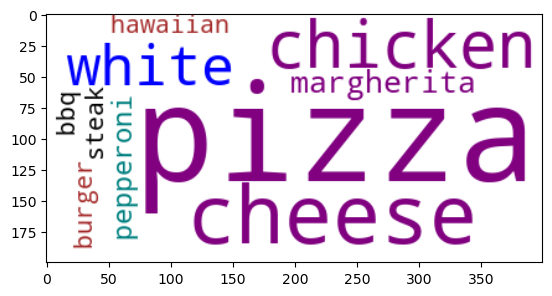

In [8]:
from wordcloud import WordCloud ### WordCloud can visualize the data and prensents the text data.
np.random.seed(0)

def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=tfidf_matrix, ### takes as input a df_cluster table.
                     vectorizer=vectorizer):  ### set only 10 words to appear in the image.
    indices = df_cluster.Index.values ### define indices as cluster index value.
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0] ### define summed_tifdf as sum of the tfidf matrix indices.
    data = {'Word': vectorizer.get_feature_names(),'Summed TFIDF': summed_tfidf} ### use summed TFIDF to count the frequency of each words.
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False) ### rank the summed TFIDF in decending way.
    words_to_score = {word: score
                     for word, score in df_ranked_words[:max_words].values
                     if score != 0}
    cloud_generator = WordCloud(background_color='white', ### define the image background as white.
                                color_func=_color_func, ### use _color_function as color function.
                                random_state=1)
    wordcloud_image = cloud_generator.fit_words(words_to_score)
    return wordcloud_image ### generate the image by WordColoud function.

def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown']) ### define specific five colors for _color_function.

wordcloud_image = cluster_to_image(cluster_groups[0]) ### show the cluster image.
plt.imshow(wordcloud_image, interpolation="bilinear") ### define the word weights as bilinear formula.
plt.show() ### show the graph.

### 3. Wordcloud for the most prevalent average price for pizza
**Listing 3.1. Vectorizing average price**

In [9]:
v = TfidfVectorizer(stop_words='english') ### use TFIDF to detect English words.
tfidf_matrix = v.fit_transform(pizza_dict['average_price'].values.astype('U')).toarray() ### vectorize the text list and make it becomes a matrix
print(tfidf_matrix.shape) ### print the dimension of the matrix.

(3509, 77)


**Listing 3.2. Removing the null data and vectorizing the average price**

In [10]:
total_prices = pizza.loc[:, "average_price"] ### create a list of average_price
total_prices = [item for item in total_prices if not(pd.isnull(item))==True] ### remove the null data

vectorizer = TfidfVectorizer(stop_words='english') ### define vectorizer using TfidfVectorize and only detect English words.
tfidf_matrix = vectorizer.fit_transform(total_prices) ### makes total_prices into matrix format.
num_rows, num_columns = tfidf_matrix.shape ### define rows and columns as num_rows and num_columns.
print(f"Our matrix has {num_rows} rows and {num_columns} columns") ### print out the results.

Our matrix has 3509 rows and 77 columns


**Listing 3.3. Dimensionally reducing the TFIDF matrix**

In [11]:
import numpy as np
from sklearn.decomposition import TruncatedSVD  ### use SVD modules to reduce TFIDF matrix dimensions.
from sklearn.preprocessing import normalize  ### normalize the data.
np.random.seed(0)  ### random seed.

def shrink_matrix(tfidf_matrix):
    svd_object = TruncatedSVD(n_components=50) ### shink the matrix to 50 dimensions with SVD.
    shrunk_matrix = svd_object.fit_transform(tfidf_matrix) ### get the shrunk matrix by svd tranksform function.
    return normalize(shrunk_matrix) ### normalize the new matrix.
 
shrunk_norm_matrix = shrink_matrix(tfidf_matrix)  ### get the nomral shrunk matrix.
print(shrunk_norm_matrix.shape) ### print the dimenstion of the nomral shrunk matrix.

(3509, 50)


**Listing 3.4. Clustering average prices into 1 clusters**

In [12]:
np.random.seed(2) ### use the random seed.
from sklearn.cluster import KMeans ### use Kmeans to group the data.

def compute_cluster_groups(shrunk_norm_matrix, k=1): ### K values is 1, it will present a list of panda table where 
    cluster_model = KMeans(n_clusters=k)      ### each table present a cluster and total clusters is 1.
    clusters = cluster_model.fit_predict(shrunk_norm_matrix) ###use KMeans pridict funtion to get the clusters.
    df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters,
                       'Bullet': total_prices}) ### tracks each clustered average price's index in clusters, clusters ID and text.
    return [df_cluster for  _, df_cluster in df.groupby('Cluster')] ### return the result for each clusters.

cluster_groups = compute_cluster_groups(shrunk_norm_matrix) ###apply the cluster rule into the matrix.

**Listing 3.5. Visualizing the cluster**

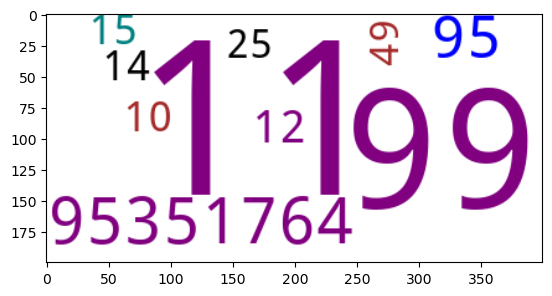

In [13]:
from wordcloud import WordCloud ###WordCloud can visualize the data and prensents the text data.
np.random.seed(0)

def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=tfidf_matrix,###takes as input a df_cluster table.
                     vectorizer=vectorizer):  ### set only 10 words to appear in the image.
    indices = df_cluster.Index.values ### define indices as cluster index value.
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0] ### define summed_tifdf as sum of the tfidf matrix indices.
    data = {'Word': vectorizer.get_feature_names(),'Summed TFIDF': summed_tfidf} ### use summed TFIDF to count the frequency of each words.
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False) ### rank the summed TFIDF in decending way.
    words_to_score = {word: score
                     for word, score in df_ranked_words[:max_words].values
                     if score != 0}
    cloud_generator = WordCloud(background_color='white', ### define the image background as white.
                                color_func=_color_func, ### use _color_function as color function.
                                random_state=1)
    wordcloud_image = cloud_generator.fit_words(words_to_score)
    return wordcloud_image ### generate the image by WordColoud function.

def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown']) ### define specific five colors for _color_function.

wordcloud_image = cluster_to_image(cluster_groups[0]) ### show the cluster image.
plt.imshow(wordcloud_image, interpolation="bilinear") ### define the word weights as bilinear formula.
plt.show() ### show the graph.

**Listing 3.6. Printing sample average prices from the cluster**

In [14]:
np.random.seed(1) ### use random seed(1).
def print_cluster_sample(cluster_id):
    df_cluster = cluster_groups[cluster_id]
    for prices in np.random.choice(df_cluster.Bullet.values, 5, 
                                   replace=False):
        print(prices)  ### print out 5 average prices from cluster group(id).

print_cluster_sample(0) ### print the cluster average prices.

12
7.95
15.99
12.99
16.45


### 4. Wordcloud for the most prevalent pizza restaurant
**Listing 4.1. Vectorizing pizza restaurant name**

In [15]:
v = TfidfVectorizer(stop_words='english') ### use TFIDF to detect English words.
tfidf_matrix = v.fit_transform(pizza_dict['name'].values.astype('U')).toarray() ### vectorize the menu names and make it becomes a matrix
print(tfidf_matrix.shape) ### print the dimension of the matrix.

(3509, 1279)


**Listing 4.2. Removing the null data and vectorizing the restaurant name**

In [16]:
total_menus = pizza_dict['name'] ### create a list of menus_name
total_menus = [item for item in total_menus if not(pd.isnull(item))==True] ### remove the null data

vectorizer = TfidfVectorizer(stop_words='english') ### define vectorizer using TfidfVectorize and only detect English words.
tfidf_matrix = vectorizer.fit_transform(total_menus) ### makes total_menus into matrix format.
num_rows, num_columns = tfidf_matrix.shape ### define rows and columns as num_rows and num_columns.
print(f"Our matrix has {num_rows} rows and {num_columns} columns") ### print out the results.

Our matrix has 3508 rows and 1278 columns


**Listing 4.3. Dimensionally reducing the TFIDF matrix**

In [17]:
import numpy as np
from sklearn.decomposition import TruncatedSVD  ### use SVD modules to reduce TFIDF matrix dimensions.
from sklearn.preprocessing import normalize  ### normalize the data.
np.random.seed(0)  ### random seed.

def shrink_matrix(tfidf_matrix):
    svd_object = TruncatedSVD(n_components=100) ### shink the matrix to 100 dimensions with SVD.
    shrunk_matrix = svd_object.fit_transform(tfidf_matrix) ### get the shrunk matrix by svd tranksform function.
    return normalize(shrunk_matrix) ### normalize the new matrix.
 
shrunk_norm_matrix = shrink_matrix(tfidf_matrix)  ### get the nomral shrunk matrix.
print(shrunk_norm_matrix.shape) ### print the dimenstion of the nomral shrunk matrix.

(3508, 100)


**Listing 4.4. Clustering restaurant name into 1 clusters**

In [18]:
np.random.seed(0) ### use the random seed.
from sklearn.cluster import KMeans ### use Kmeans to group the data.

def compute_cluster_groups(shrunk_norm_matrix, k=1): ### K values is 1, it will present a list of panda table where 
    cluster_model = KMeans(n_clusters=k)      ### each table present a cluster and total clusters is 1.
    clusters = cluster_model.fit_predict(shrunk_norm_matrix) ### use KMeans pridict funtion to get the clusters.
    df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters,
                       'Bullet': total_menus}) ### tracks each clustered pizza name's index in clusters, clusters ID and text.
    return [df_cluster for  _, df_cluster in df.groupby('Cluster')] ### return the result for each clusters.

cluster_groups = compute_cluster_groups(shrunk_norm_matrix) ### apply the cluster rule into the matrix.

**Listing 4.5. Visualizing the cluster**

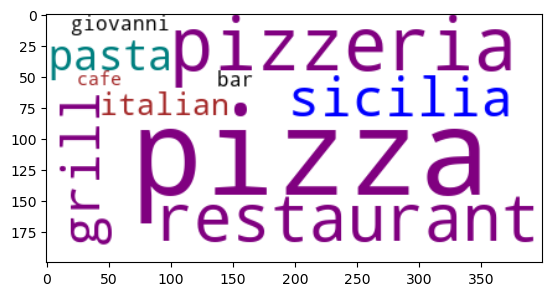

In [19]:
from wordcloud import WordCloud ### WordCloud can visualize the data and prensents the text data.
np.random.seed(0)

def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=tfidf_matrix, ### takes as input a df_cluster table.
                     vectorizer=vectorizer):  ### set only 10 words to appear in the image.
    indices = df_cluster.Index.values ### define indices as cluster index value.
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0] ### define summed_tifdf as sum of the tfidf matrix indices.
    data = {'Word': vectorizer.get_feature_names(),'Summed TFIDF': summed_tfidf} ### use summed TFIDF to count the frequency of each words.
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False) ### rank the summed TFIDF in decending way.
    words_to_score = {word: score
                     for word, score in df_ranked_words[:max_words].values
                     if score != 0}
    cloud_generator = WordCloud(background_color='white', ### define the image background as white.
                                color_func=_color_func, ### use _color_function as color function.
                                random_state=1)
    wordcloud_image = cloud_generator.fit_words(words_to_score)
    return wordcloud_image ### generate the image by WordColoud function.

def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown']) ### define specific five colors for _color_function.

wordcloud_image = cluster_to_image(cluster_groups[0]) ### show the cluster image.
plt.imshow(wordcloud_image, interpolation="bilinear") ### define the word weights as bilinear formula.
plt.show() ### show the graph.

**Listing 4.6. Printing sample restaurant name from the cluster**

In [20]:
np.random.seed(1) ### use random seed(1).
def print_cluster_sample(cluster_id):
    df_cluster = cluster_groups[cluster_id]
    for prices in np.random.choice(df_cluster.Bullet.values, 5, 
                                   replace=False):
        print(prices)  ### print out 5 average prices from cluster group(id).

print_cluster_sample(0) ### print the cluster average prices.

Daddy's Pizza
Mario's Pizza
Rick's Cabaret
Arirang Hibachi Steakhouse
Original Giorgio's
